In [19]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import scipy.io as sio
import numpy as np

def load_data(path, root, output_dir):
    data = sio.loadmat(os.path.join(output_dir, 'H_' + path.split('.')[0].split('rgb')[1] + '.mat'))
    return np.array(Image.open(os.path.join(root, path))), data['H']

# Panorama
ref_image = 3
input_dir = '/DATASETS/drone'
output_dir = 'panorama_output'


# Run project code
#MATLAB/OCTAVE: COMMENT THIS LINE AND UNCOMMENT THE NEXT 
os.system('python3 pivproject2022_task2.py %d %s %s' %(ref_image, input_dir, output_dir))
# os.system('octave pivproject2022_task2.m %d %s %s' %(ref_image, input_dir, output_dir))
print('finished running code')

finished running code


In [15]:
ims, limits, Hs = [], [], []
for fname in sorted(os.listdir(input_dir)):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        im, H = load_data(fname, input_dir, output_dir)
        s1,s2,s3 = im.shape
        ims.append(im)
        Hs.append(H)
        
        # Get limits
        corners = np.array([[0,0,1],[0,s1,1],[s2,s1,1],[s2,0,1]])
        nc = np.matmul(corners,H.T)
        limits.append(nc[:,0:2]/nc[:,2:3])

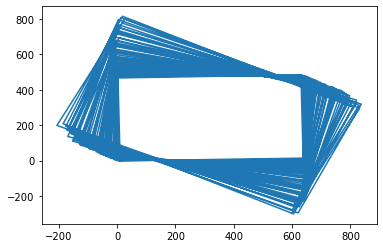

In [16]:
# Find limits of panorama
lims = np.concatenate(limits,axis=0)
minx, maxx = lims[:,0].min(), lims[:,0].max()
miny, maxy = lims[:,1].min(), lims[:,1].max()
plt.plot(lims[:,0],lims[:,1])

# Correct homography to be within image limits
From the figure above it's easy to compute a transformation (homography ?) to apply to all images (homographies !) 
so that the warped image as positive coordinates in order to fit in an array. In other words, xmin and ymin should be mapped to (0,0).
Also you can include a scaling factor to make the mosaic smaller.


# Final Output 
After computing the final transformation of all images to an array (the final panorama) the output can be generated with opencv function
cv2.warpPerspective. After warping all images you can blend them. Suggestion is a simple criterion (average, max, the last pixel...keep it simple!).

BEFORE RENDERING, ALLWAYS MAKE SURE YOUR IMAGE LIMITS (figure above) IS NOT HUGE - YOU MAY CRASH A SERVER SO PLEASE DO THIS IN YOUR OWN COMPUTER.

In [ ]:
import cv2
# rendering with opencv functions - see cv2.warpPerspective

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


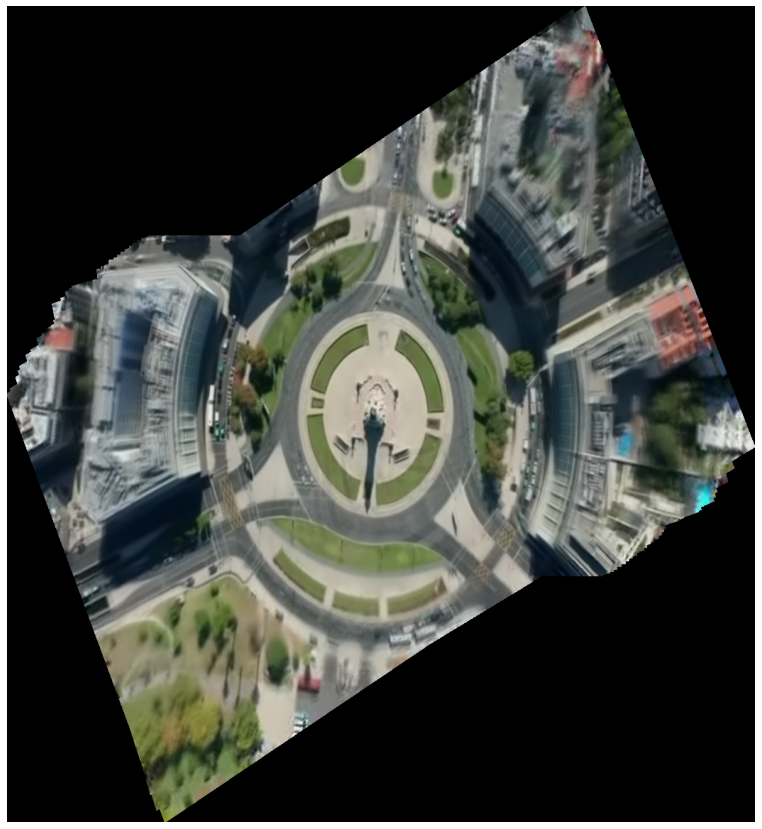